In [9]:
from pyAudioAnalysis import MidTermFeatures as aF
from pyAudioAnalysis import audioTrainTest as aT
from sklearn.model_selection import train_test_split
#aF.multiple_directory_feature_extraction(dirs, mt, mt, st, st, False)

dirs = ["AD", "Healthy", "MCI"]
# segment-level feature extraction:
feature_matrix = [] 
for d in dirs: # get feature matrix for each directory (class) 
    f, files, fn = aF.directory_feature_extraction(d, 1, 1, 
                                                   0.1, 0.05) 
    feature_matrix.append(f)


Analyzing file 1 of 18: AD\012.wav
Analyzing file 2 of 18: AD\014.wav
Analyzing file 3 of 18: AD\035.wav
Analyzing file 4 of 18: AD\057.wav
Analyzing file 5 of 18: AD\064.wav
Analyzing file 6 of 18: AD\074.wav
Analyzing file 7 of 18: AD\075.wav
Analyzing file 8 of 18: AD\076.wav
Analyzing file 9 of 18: AD\077.wav
Analyzing file 10 of 18: AD\078.wav
Analyzing file 11 of 18: AD\079.wav
Analyzing file 12 of 18: AD\080.wav
Analyzing file 13 of 18: AD\081.wav
Analyzing file 14 of 18: AD\083.wav
Analyzing file 15 of 18: AD\084.wav
Analyzing file 16 of 18: AD\085.wav
Analyzing file 17 of 18: AD\086.wav
Analyzing file 18 of 18: AD\088.wav
Feature extraction complexity ratio: 27.9 x realtime
Analyzing file 1 of 29: Healthy\015.wav
Analyzing file 2 of 29: Healthy\017.wav
Analyzing file 3 of 29: Healthy\020.wav
Analyzing file 4 of 29: Healthy\021.wav
Analyzing file 5 of 29: Healthy\022.wav
Analyzing file 6 of 29: Healthy\023.wav
Analyzing file 7 of 29: Healthy\024.wav
Analyzing file 8 of 29: Heal

In [10]:
AD_matrix = feature_matrix[0]
Healthy_matrix = feature_matrix[1]
MCI_matrix = feature_matrix[2]
feature_matrix_list = [AD_matrix, Healthy_matrix, MCI_matrix]


label_matrix = []

length_matrix = []
for i in feature_matrix_list:
    length_matrix.append(len(i))
    print(len(i))

for i in range(3):
    for z in range(len(feature_matrix_list[i])):
        label_matrix.append(dirs[i])

#print(label_matrix)


18
29
28


In [11]:
feature_matrix_extended = []
for i in feature_matrix:
    for z in i:
        feature_matrix_extended.append(z)

#print(feature_matrix_extended[0])

In [12]:
feature_train, feature_test, label_train, label_test = train_test_split(feature_matrix_extended, label_matrix, test_size=0.33)
#fix the test train split

In [13]:
trained_model = aT.train_svm(feature_train, label_train, 5)

In [14]:
from sklearn import metrics
predict = trained_model.predict(feature_test)

print(metrics.accuracy_score(label_test, predict))

print(metrics.multilabel_confusion_matrix(label_test, predict))
print(metrics.classification_report(label_test, predict))

0.52
[[[18  1]
  [ 3  3]]

 [[ 8 10]
  [ 1  6]]

 [[12  1]
  [ 8  4]]]
              precision    recall  f1-score   support

          AD       0.75      0.50      0.60         6
     Healthy       0.38      0.86      0.52         7
         MCI       0.80      0.33      0.47        12

    accuracy                           0.52        25
   macro avg       0.64      0.56      0.53        25
weighted avg       0.67      0.52      0.52        25



As shown above, the multi-class SVC trained on the data extracted by pyaudioanalysis, and trained with a C = 5 value & linear kernel produced a 60% accuracy rate classifying the 3 classes.

Analyze data below graphically:

C:\Users\EliKurtz\AppData\Local\Temp\ipykernel_2736\2368868273.py:20: RuntimeWarning: invalid value encountered in log
  plt.bar(fn, np.log(AD_average_list))


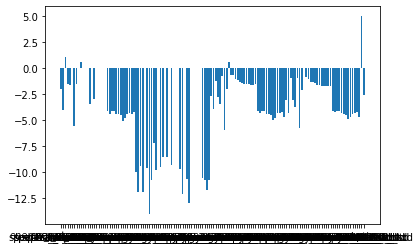

C:\Users\EliKurtz\AppData\Local\Temp\ipykernel_2736\2368868273.py:23: RuntimeWarning: invalid value encountered in log
  plt.bar(fn, np.log(Healthy_average_list))


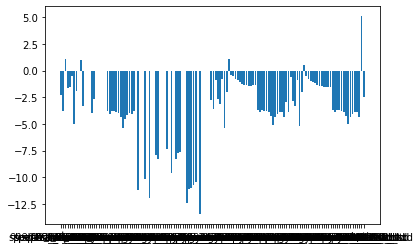

C:\Users\EliKurtz\AppData\Local\Temp\ipykernel_2736\2368868273.py:26: RuntimeWarning: invalid value encountered in log
  plt.bar(fn, np.log(MCI_average_list))


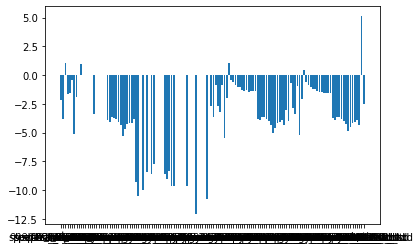

In [15]:
from matplotlib import pyplot as plt
import numpy as np

def average_matrix(input_matrix):
    average_list = []
    count = 0
    while count < len(fn):
        inner_average_list = []
        for i in input_matrix:
            inner_average_list.append(i[count])
        average_list.append(np.average(inner_average_list))
        count += 1
    return average_list

 
AD_average_list = average_matrix(AD_matrix)
Healthy_average_list = average_matrix(Healthy_matrix)
MCI_average_list = average_matrix(MCI_matrix)

plt.bar(fn, np.log(AD_average_list))
plt.show()

plt.bar(fn, np.log(Healthy_average_list))
plt.show()

plt.bar(fn, np.log(MCI_average_list))
plt.show()